# Boston 주택 가격 예측 모델

## 데이터 로드 및 전처리

In [62]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [63]:
# keras.datasets boston_housing 데이터셋 로드
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = boston_housing.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size = 0.2,
                                                  random_state = 42)
                                                  

# 데이터셋의 크기를 확인
print(len(x_train_full))
print(len(x_test))

404
102


In [64]:
# 데이터의 각 특성의 평균을 빼고
mean = x_train_full.mean(axis = 0)
x_train_full = x_train_full - mean

# 표준편차를 나눔
std = x_train_full.std(axis = 0)
x_train_full = x_train_full / std

# 테스트 데이터셋 동일하게 처리
x_test = x_test - mean
x_test = x_test / std

## 모델 구성 및 컴파일

In [65]:
x_train_full.shape

(404, 13)

In [66]:
x_test.shape

(102, 13)

In [67]:
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(x_train.shape[1], ), kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16, kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation = 'linear'))       # 회귀 문제이므로

model.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['mae'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                448       
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_3 (Batc  (None, 16)               64        
 hNormalization)                                      

## 모델 학습

In [68]:
history = model.fit(x_train, y_train,
                    epochs = 100,
                    batch_size = 16,
                    validation_data = (x_val, y_val)
                    )

Epoch 1/100
21/21 [==============================] - 1s 5ms/step - loss: 623.5552 - mae: 23.0666 - val_loss: 734.2654 - val_mae: 26.2820
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 608.5870 - mae: 22.8060 - val_loss: 597.4080 - val_mae: 23.4999
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 593.7004 - mae: 22.4510 - val_loss: 549.1255 - val_mae: 22.4416
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 583.5104 - mae: 22.2470 - val_loss: 514.2275 - val_mae: 21.6362
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 570.7772 - mae: 21.9950 - val_loss: 490.8599 - val_mae: 21.0884
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 558.4762 - mae: 21.7472 - val_loss: 473.9302 - val_mae: 20.6714
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 551.3481 - mae: 21.6134 - val_loss: 460.4570 - val_mae: 20.3447
Epoch 8/100
21/21 [======================

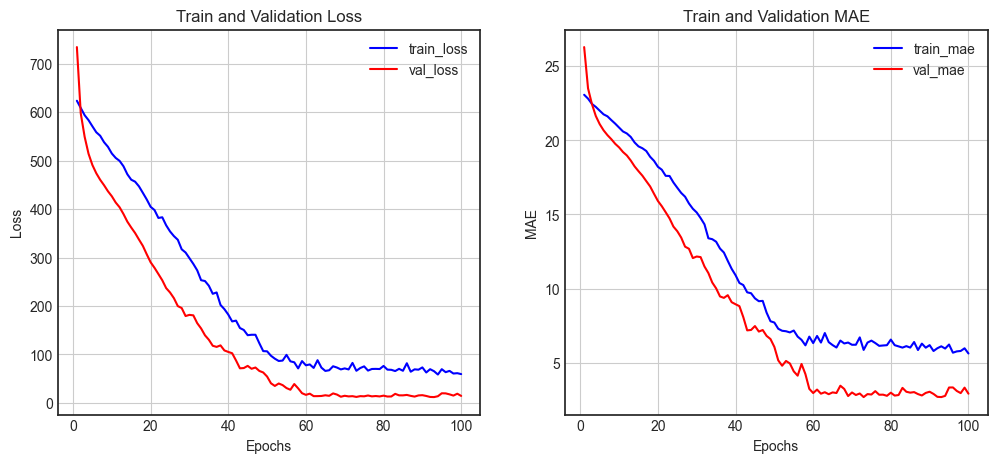

In [69]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [70]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE : {mae:.4f}')

RMSE: 18.7134
MAE : 17.4225


# Reuters 딥러닝 모델

## 데이터 로드 및 전처리

In [85]:
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [86]:
(x_train_full, y_train_full), (x_test, y_test) = reuters.load_data(num_words=10000)

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size = 0.25,
                                                  random_state = 42)

print(len(x_train_full))
print(len(x_val))
print(len(x_test))
print(len(set(y_train_full)))

8982
2246
2246
46


In [87]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(x_test)

In [88]:
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

## 모델 구성 및 컴파일

In [89]:
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.3))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1280128   
                                                                 
 batch_normalization_8 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 128)               0         
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_9 (Batc  (None, 64)               256       
 hNormalization)                                      

## 모델 학습

In [90]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('keras_reuters_model.h5', save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=5, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/40
14/14 [==============================] - 1s 29ms/step - loss: 5.8465 - accuracy: 0.3165 - val_loss: 5.6416 - val_accuracy: 0.5779
Epoch 2/40
14/14 [==============================] - 0s 20ms/step - loss: 3.8559 - accuracy: 0.6357 - val_loss: 4.8144 - val_accuracy: 0.6861
Epoch 3/40
14/14 [==============================] - 0s 20ms/step - loss: 2.9382 - accuracy: 0.7424 - val_loss: 4.2764 - val_accuracy: 0.7271
Epoch 4/40
14/14 [==============================] - 0s 22ms/step - loss: 2.3480 - accuracy: 0.7855 - val_loss: 3.9058 - val_accuracy: 0.7333
Epoch 5/40
14/14 [==============================] - 0s 21ms/step - loss: 1.9316 - accuracy: 0.8248 - val_loss: 3.6563 - val_accuracy: 0.7142
Epoch 6/40
14/14 [==============================] - 0s 20ms/step - loss: 1.6422 - accuracy: 0.8489 - val_loss: 3.4706 - val_accuracy: 0.6242
Epoch 7/40
14/14 [==============================] - 0s 20ms/step - loss: 1.4214 - accuracy: 0.8694 - val_loss: 3.2708 - val_accuracy: 0.5534
Epoch 8/40
14

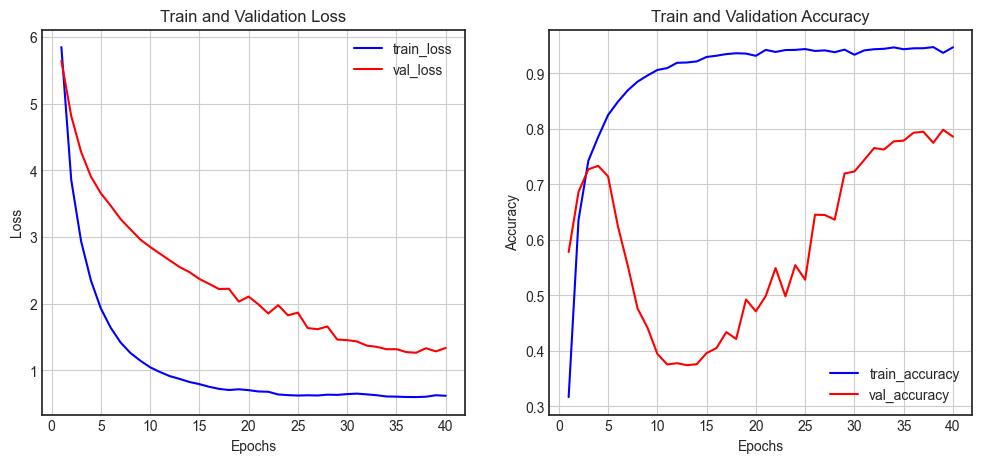

In [91]:
# 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [92]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.3964 - accuracy: 0.7752


[1.396435260772705, 0.7751558423042297]

In [95]:
y_pred = model.predict(x_test)

from sklearn.metrics import classification_report

print(
    classification_report(
    np.argmax(y_test, axis=-1),
    np.argmax(y_pred, axis=-1)      
)
)

71/71 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.71      0.71      0.71       105
           2       0.72      0.65      0.68        20
           3       0.85      0.94      0.90       813
           4       0.84      0.85      0.85       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.33      0.50         3
           8       0.76      0.68      0.72        38
           9       0.84      0.64      0.73        25
          10       0.86      0.83      0.85        30
          11       0.61      0.76      0.68        83
          12       0.40      0.15      0.22        13
          13       0.50      0.54      0.52        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.72     

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# CIFAR10 딥러닝 모델

## 데이터 로드 및 전처리

In [102]:
from tensorflow.keras.datasets import cifar10

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()   

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size = 0.2,
                                                  random_state = 42)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [103]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

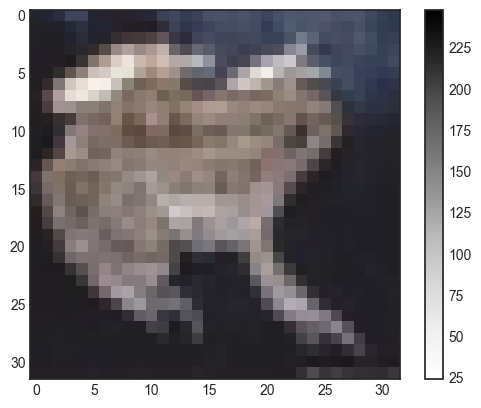

In [104]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [107]:
x_train.shape[0]

40000

In [112]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
# reshape

x_train = x_train.reshape(x_train.shape[0], 32*32*3)
x_val   = x_val.reshape(x_val.shape[0], 32*32*3)
x_test  = x_test.reshape(x_test.shape[0], 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [109]:
# scaling

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일

In [121]:
model = models.Sequential()

model.add(layers.Dense(256, input_shape=(3072, ), kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64, kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.1))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 256)               786688    
                                                                 
 batch_normalization_22 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_22 (Activation)  (None, 256)               0         
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_23 (Bat  (None, 128)              512       
 chNormalization)                                    

## 모델 학습

In [122]:
check_point_cb = callbacks.ModelCheckpoint('keras_cifar10_model.h5', save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=5, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
313/313 [==============================] - 2s 7ms/step - loss: 3.9287 - accuracy: 0.3333 - val_loss: 2.7050 - val_accuracy: 0.2063
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 2.1798 - accuracy: 0.3684 - val_loss: 2.3207 - val_accuracy: 0.2883
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 2.0390 - accuracy: 0.3752 - val_loss: 2.1568 - val_accuracy: 0.3185
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 2.0115 - accuracy: 0.3773 - val_loss: 2.3927 - val_accuracy: 0.2260
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 2.0030 - accuracy: 0.3780 - val_loss: 2.2312 - val_accuracy: 0.2943
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 2.0037 - accuracy: 0.3784 - val_loss: 2.3897 - val_accuracy: 0.2372
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 2.0010 - accuracy: 0.3790 - val_loss: 2.3287 - val_accuracy: 0.2445
Epoch 

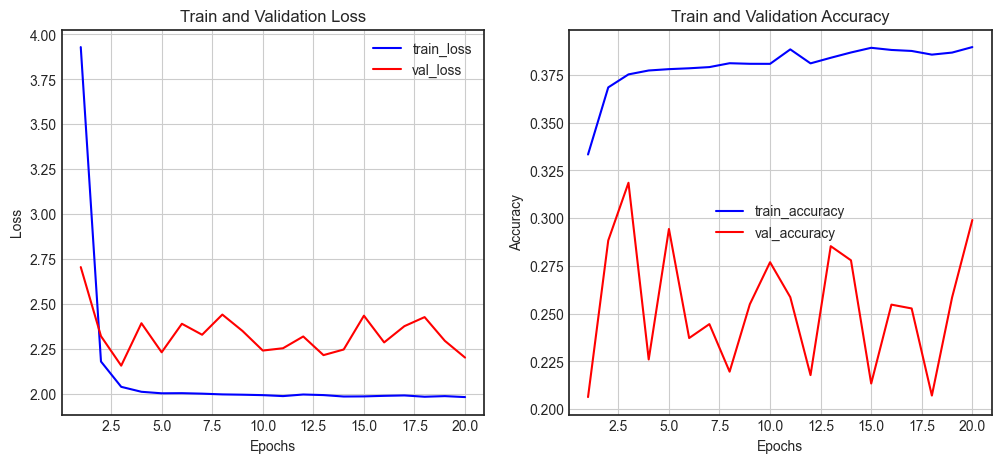

In [124]:
# 시각화

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델 평가 및 예측

In [125]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.1981 - accuracy: 0.3032


[2.198136329650879, 0.30320000648498535]

In [126]:
y_pred = model.predict(x_test)

from sklearn.metrics import classification_report

print(
    classification_report(
    np.argmax(y_test, axis=-1),
    np.argmax(y_pred, axis=-1)      
)
)

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.11      0.20     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.11     10000
   macro avg       0.10      0.01      0.02     10000
weighted avg       1.00      0.11      0.20     10000



c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r